In [1]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import shap
import joblib

In [2]:


# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/e-nose for beef quality monitoring dataset.csv')

# Display basic dataset information
print("Dataset Overview:\n", data.info())
print("\nFirst 5 Rows:\n", data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4553 entries, 0 to 4552
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   minute       4553 non-null   int64  
 1   class        4553 non-null   object 
 2   TVC          4553 non-null   float64
 3   MQ135        4553 non-null   float64
 4   MQ136        4553 non-null   float64
 5   MQ2          4553 non-null   float64
 6   MQ3          4553 non-null   float64
 7   MQ4          4553 non-null   float64
 8   MQ5          4553 non-null   float64
 9   MQ6          4553 non-null   float64
 10  MQ7          4553 non-null   float64
 11  MQ8          4553 non-null   float64
 12  MQ9          4553 non-null   float64
 13  Humidity     4553 non-null   float64
 14  Temperature  4553 non-null   float64
dtypes: float64(13), int64(1), object(1)
memory usage: 533.7+ KB
Dataset Overview:
 None

First 5 Rows:
    minute  class       TVC  MQ135  MQ136    MQ2    MQ3    MQ4    MQ5   MQ6

In [3]:
# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/e-nose for beef quality monitoring dataset.csv')

# Display basic dataset information
print("Dataset Overview:\n", data.info())
print("\nFirst 5 Rows:\n", data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4553 entries, 0 to 4552
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   minute       4553 non-null   int64  
 1   class        4553 non-null   object 
 2   TVC          4553 non-null   float64
 3   MQ135        4553 non-null   float64
 4   MQ136        4553 non-null   float64
 5   MQ2          4553 non-null   float64
 6   MQ3          4553 non-null   float64
 7   MQ4          4553 non-null   float64
 8   MQ5          4553 non-null   float64
 9   MQ6          4553 non-null   float64
 10  MQ7          4553 non-null   float64
 11  MQ8          4553 non-null   float64
 12  MQ9          4553 non-null   float64
 13  Humidity     4553 non-null   float64
 14  Temperature  4553 non-null   float64
dtypes: float64(13), int64(1), object(1)
memory usage: 533.7+ KB
Dataset Overview:
 None

First 5 Rows:
    minute  class       TVC  MQ135  MQ136    MQ2    MQ3    MQ4    MQ5   MQ6

In [4]:
# Separate features and target
X = data.drop(columns=['minute','class','MQ136','MQ5','MQ3','MQ4','MQ8'])
y = data['class']

In [5]:
# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

In [7]:
# Initialize Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

In [8]:
# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
print("Starting hyperparameter tuning...")
grid_search.fit(X_train, y_train)
print("Hyperparameter tuning completed.")

Starting hyperparameter tuning...
Hyperparameter tuning completed.


In [9]:
# Best model
best_model = grid_search.best_estimator_
print("\nBest Parameters:", grid_search.best_params_)


Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [10]:
y_pred = best_model.predict(X_test)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

       Fresh       1.00      1.00      1.00       204
     spoiled       1.00      1.00      1.00      1162

    accuracy                           1.00      1366
   macro avg       1.00      1.00      1.00      1366
weighted avg       1.00      1.00      1.00      1366



In [11]:
# Compute ROC-AUC for multi-class classification
y_prob = best_model.predict_proba(X_test)
roc_auc = roc_auc_score(y_test, y_prob[:,1], multi_class='ovr')
print("ROC-AUC Score:", roc_auc)

ROC-AUC Score: 1.0


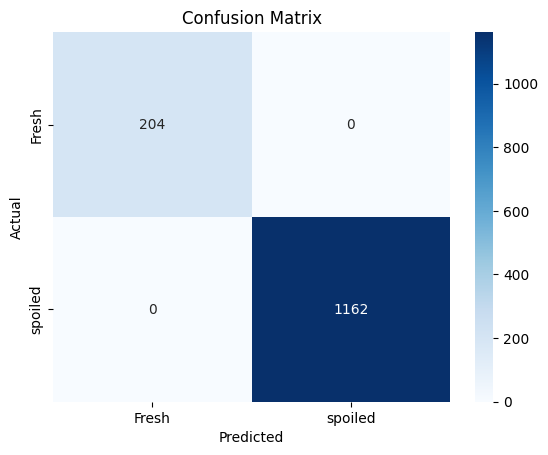

In [12]:
# Confusion matrix visualization
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
# SHAP Analysis
print("Starting SHAP analysis...")
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_test)

Starting SHAP analysis...


In [ ]:
# Summary plot for each class
for i in range(len(np.unique(y))):  # Loop through each class
    print(f"\nSHAP Summary Plot for Class {i}")
    shap.summary_plot(shap_values[i], X_test, feature_names=data.drop(columns=['minute','class','MQ7','MQ8','Humidity','Temperature']).columns)


SHAP Summary Plot for Class 0


AssertionError: The shape of the shap_values matrix does not match the shape of the provided data matrix.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Class distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='class', palette='viridis')
plt.title("Class Distribution of Target Feature")
plt.xlabel("Classes")
plt.ylabel("Count")
plt.show()

# Histograms for numerical features
data.drop(columns=['minute','class','MQ7','Humidity','Temperature']).hist(bins=20, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle("Histograms of Numeric Features")
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 8))
# Calculate correlation only for numeric columns by specifying numeric_only=True
correlation_matrix = data.drop(columns=['minute','class','MQ7','Humidity','Temperature']).corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

# Pairplot (useful for small datasets and few features)
# Replace 'target' with the actual target column name
sns.pairplot(data, hue='class', palette='tab10')
plt.suptitle("Pairplot of Features Colored by Target", y=1.02)
plt.show()


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
import os
save_dir = r'/content/drive/MyDrive/Colab Notebooks'
os.makedirs(save_dir, exist_ok=True)  # Create the directory if it doesn't exist
file_path = os.path.join(save_dir, 'random_forest_model.pkl')

# Save the trained model
joblib.dump(best_model, file_path)
print(f"\nModel saved at: {file_path}")


Model saved at: /content/drive/MyDrive/Colab Notebooks/random_forest_model.pkl


In [ ]:
# Define ranges for each feature
ranges = {
    'TVC': (2.5, 8.5),
    'MQ135': (5.6, 22.6),
    'MQ136': (2.24, 41.25),
    'MQ2': (2.5, 29),
    'MQ3': (6, 15),
    'MQ4': (1.4, 49.5),
    'MQ5': (4.5, 75),
    'MQ6': (2, 75),
    'MQ9': (4, 15)
}

# Define classes for the target feature
classes = ['excellent', 'good', 'acceptable', 'spoiled']

# Generate random data
np.random.seed(42)  # For reproducibility
num_samples = 3000  # Number of rows in the dataset

# Generate data for each feature
data = {
    feature: np.random.uniform(low, high, num_samples) for feature, (low, high) in ranges.items()
}

# Generate random target classes
data['class'] = np.random.choice(classes, num_samples)

# Convert to DataFrame
df_simulated = pd.DataFrame(data)

# Save the dataset to a CSV file
file_path = "/content/drive/MyDrive/Colab Notebooks/simulated_artificial_nose_dataset.csv"
df_simulated.to_csv(file_path, index=False)

print(f"Dataset saved as {file_path}")


Dataset saved as /content/drive/MyDrive/Colab Notebooks/simulated_artificial_nose_dataset.csv


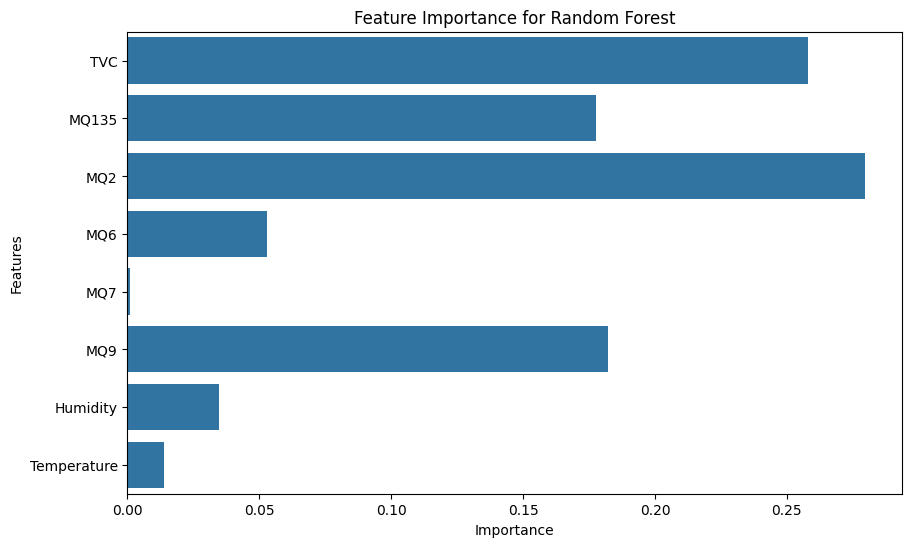

In [16]:
# Step 2: Feature Importance (For tree-based models)
feature_importances_rf = best_model.feature_importances_  # For random forest


features = X.columns

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances_rf, y=features)
plt.title("Feature Importance for Random Forest")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()
